# Explore Clusters Dataset

In [1]:
import sys

import numpy as np
import pandas as pd

sys.path.append("..")
from helpers import filename_for
from plotconf import *

In [2]:
files = [filename_for(15, 30, 600, 500, n, "inclxx", s, "clusterfeature.pkl") for n in [1, 2, 3, 4] for s in range(20)]
dfs = [pd.read_pickle(file) for file in files]
data = pd.concat(dfs, ignore_index=True).sample(frac=1, random_state=1337)

data = data[(abs(data["X"]) < 125) & (abs(data["Y"]) < 125) & (data["T"] < 100) & (data["EToF"] < 700)]

print(data["prim"].value_counts())
display(data)

0.0    8489439
1.0    1778265
Name: prim, dtype: int64


,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z
3499177,1731.0,1.0,63.755749,149.914871,6.0,607.207764,6.798460e+00,1.218181,64.293854,-0.682722,-22.500000,1522.5
8869071,3484.0,0.0,74.362877,15.335159,4.0,580.952515,3.743494e+00,0.394498,9.338829,37.500000,-1.970521,1757.5
2585062,5713.0,0.0,68.605553,37.585819,1.0,600.481689,2.278178e-13,0.000000,37.585819,-76.964607,2.500000,1632.5
2894202,5004.0,0.0,74.553833,34.140911,2.0,625.573181,2.255625e+00,0.020336,23.147533,-6.335686,17.500000,1792.5
3878350,5814.0,0.0,86.484261,7.983827,1.0,264.821777,0.000000e+00,0.000000,7.983827,98.367348,67.500000,1622.5
...,...,...,...,...,...,...,...,...,...,...,...,...
480729,1884.0,0.0,79.410904,2.277636,1.0,296.172211,0.000000e+00,0.000000,2.277636,-72.500000,-76.763123,1547.5
3361959,3033.0,1.0,63.699387,613.164795,38.0,609.370972,3.672803e+01,5.340049,52.407722,3.392983,12.500000,1522.5
7087336,7733.0,0.0,70.274147,246.902069,11.0,568.768555,1.244804e+01,2.275502,52.906334,6.802186,37.500000,1652.5
8315069,6834.0,0.0,78.157318,2.550865,1.0,425.412720,0.000000e+00,0.000000,2.550865,41.877541,82.500000,1702.5


In [3]:
prim1 = data[data["prim"] == 1]
prim0 = data[data["prim"] == 0].sample(n=len(prim1.index), random_state=1337)
balanced_data = pd.concat([prim0, prim1], ignore_index=True).sample(frac=1, random_state=1337)

print(balanced_data["prim"].value_counts())

1.0    1778265
0.0    1778265
Name: prim, dtype: int64


In [4]:
mpl.rcParams.update({
    "font.size": 25,
})

1.0    2514
0.0    2486
Name: prim, dtype: int64


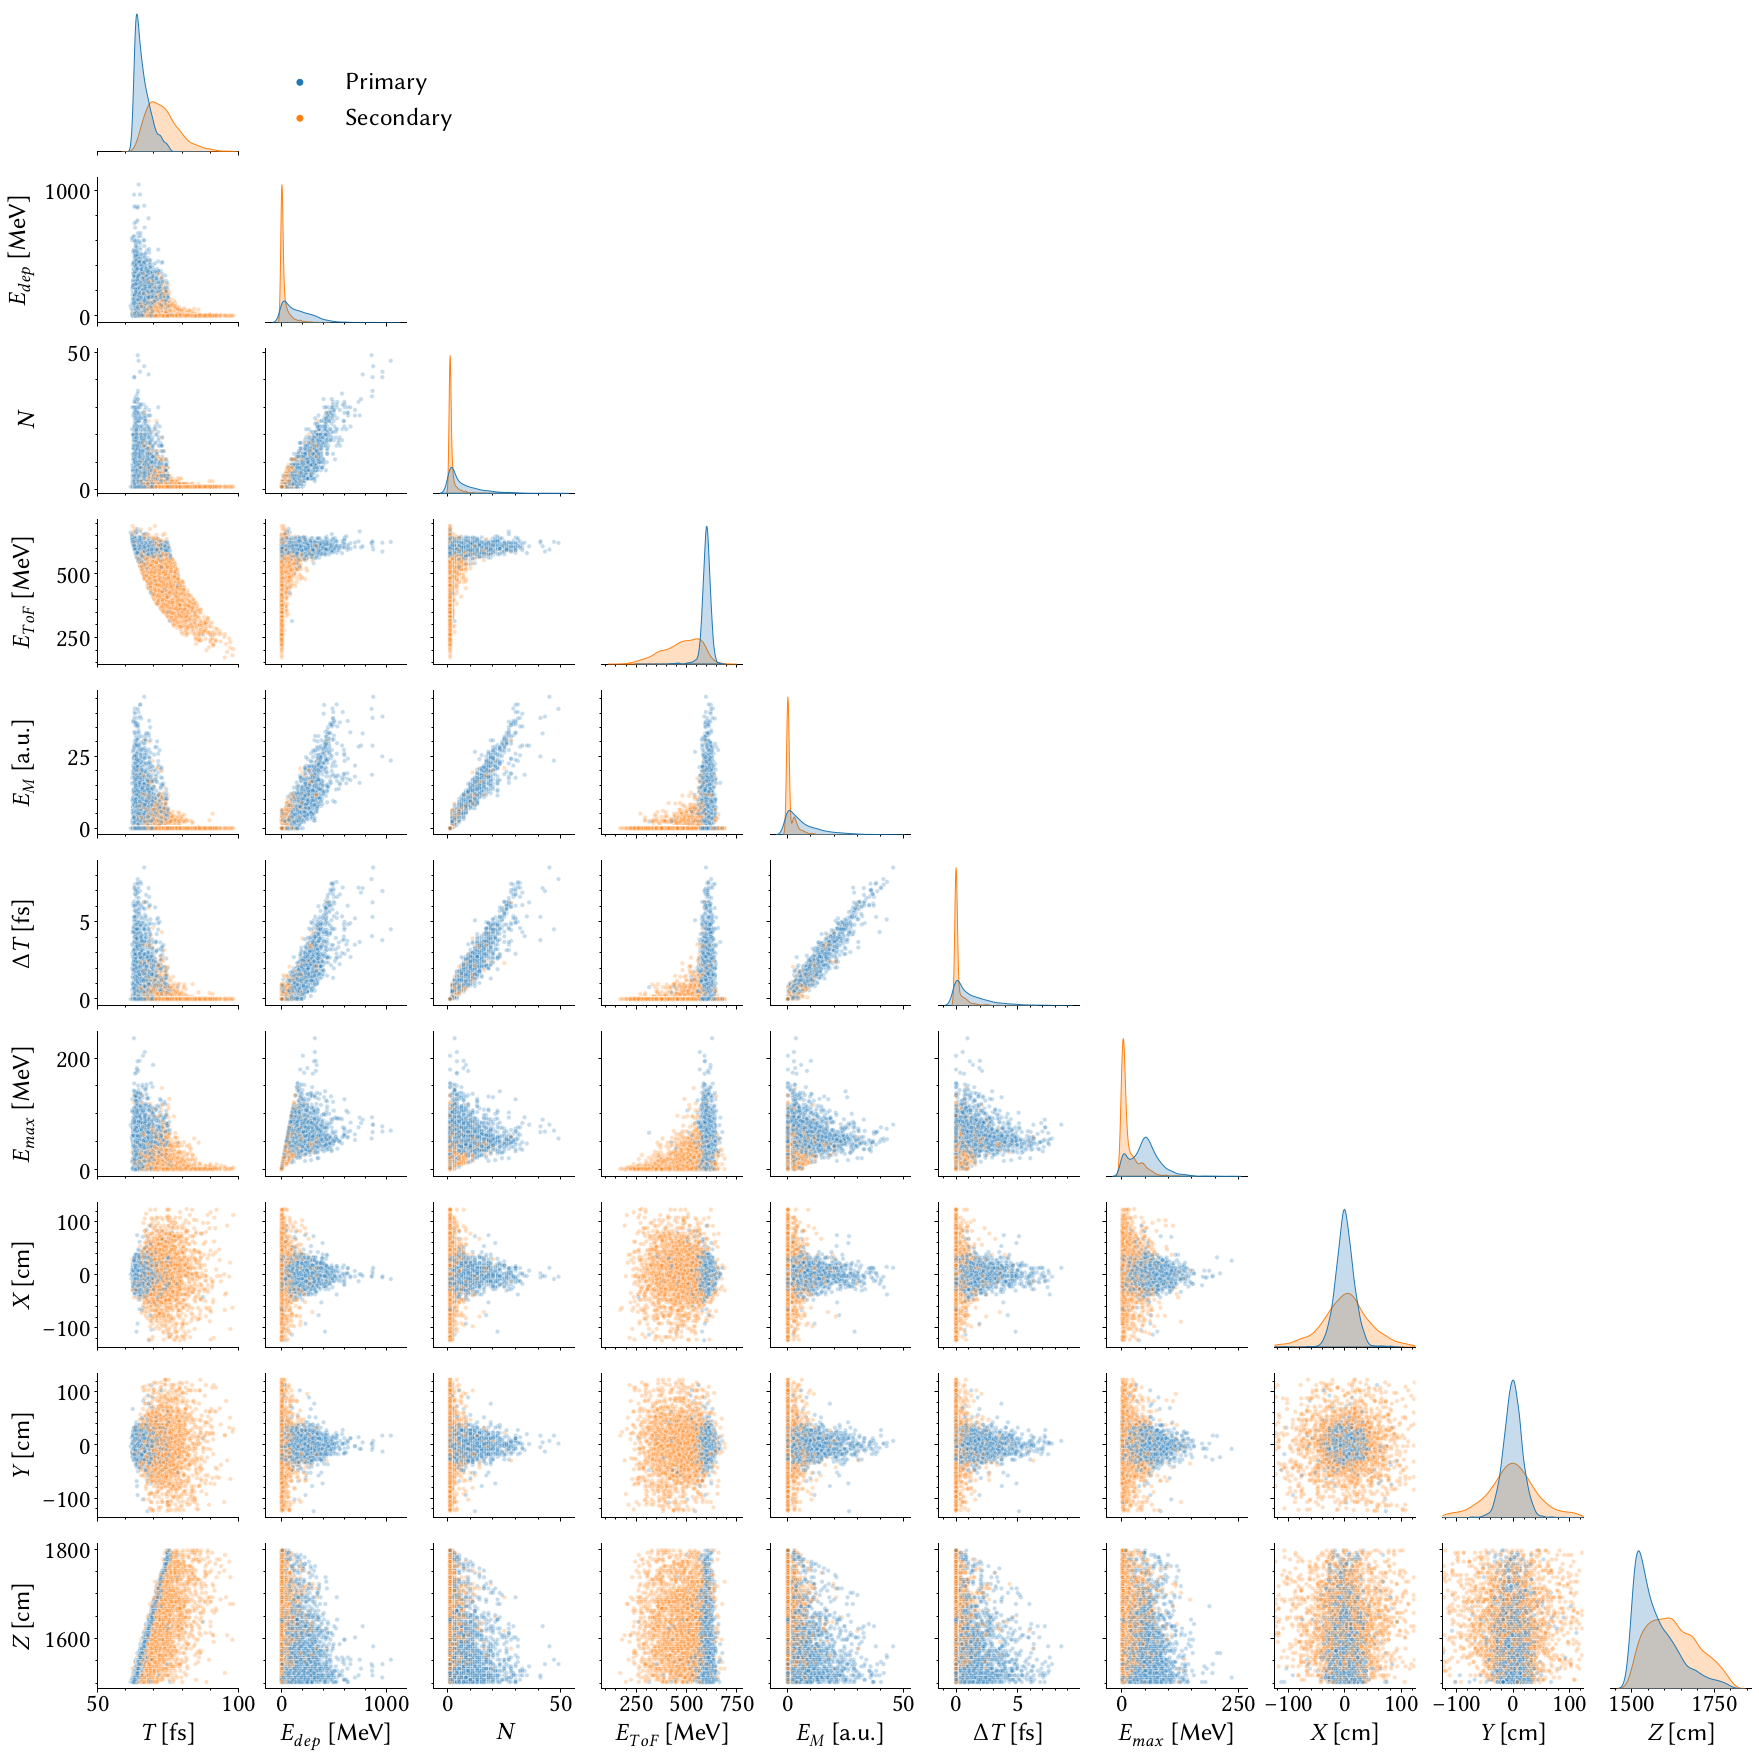

In [5]:
sample = balanced_data.sample(n=5000)
print(sample["prim"].value_counts())

g = sns.pairplot(
    sample,
    vars=["T", "E", "Size", "EToF", "EnergyMoment", "TSpawn", "MaxEHit", "X", "Y", "Z"],
    hue="prim",
    hue_order=[1, 0],
    plot_kws={"s": 20, "alpha": 0.25},
    corner=True,
)

for ax in g.axes[:, 0]:
     ax.get_yaxis().set_label_coords(-0.45, 0.5)

g.axes[-1][0].set_xlim(50, 100)
g.axes[-1][7].set_xlim(-125, 125)
g.axes[-1][8].set_xlim(-125, 125)

labels = [
    "$T$ [fs]",
    "$E_{dep}$ [MeV]",
    "$N$",
    "$E_{ToF}$ [MeV]",
    "$E_{M}$ [a.u.]",
    "$\Delta T$ [fs]",
    "$E_{max}$ [MeV]",
    "$X$ [cm]",
    "$Y$ [cm]",
    "$Z$ [cm]",
]

for i, l in enumerate(labels):
    g.axes[-1][i].set_xlabel(l)
    g.axes[i][0].set_ylabel(l)

g._legend.set_title("")
g._legend.set_bbox_to_anchor((0.25, 0.92))

for t, l in zip(g._legend.texts, ["Primary", "Secondary"]):
    t.set_text(l)

fig = g.fig
#fig.savefig(f"results/pairplot_clusterfeature.pdf", bbox_inches="tight")
fig.savefig(f"results/pairplot_clusterfeature.png", bbox_inches="tight")

display(fig)